# 0.0 Configurações Básicas


In [ ]:
#Permissão para acessar algum arquivo do Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [1]:
#aumentado a capacidade de visualização de colunas e linhas
import pandas as pd

pd.set_option('display.max_columns', 7000)
pd.set_option('display.max_rows',90000)

# 1.0 Introdução

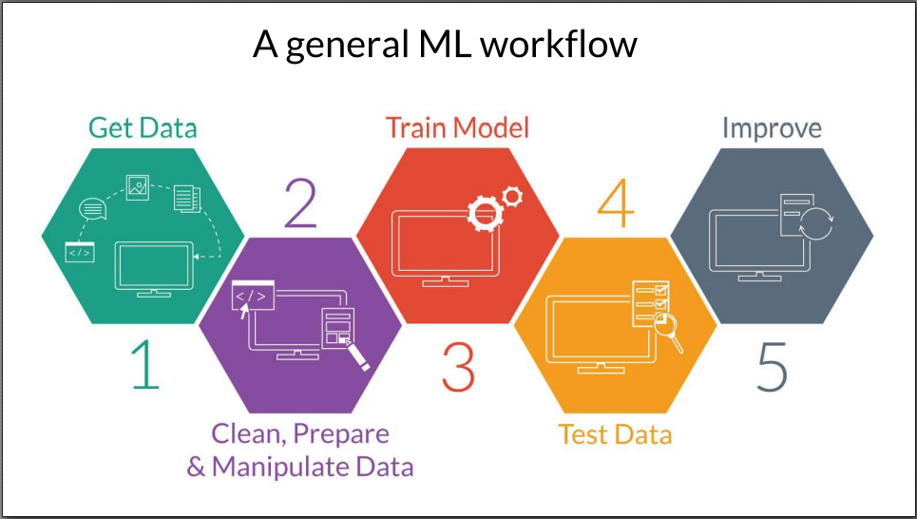

Nesta prática, vamos realizar as etapas que compreende as fases 1 e  2 do pipeline de  um projeto de Machine Learning:
- Obter os dados.
- Descobrir e visualizar os dados para obter insights.
- Preparar os dados para os algoritmos de Aprendizagem de Máquina


# 3.0 Get Data


O Banco de dados é sobre os preços das casas na California (nos anos 90). Foi obtido no [kaggle](https://www.kaggle.com/datasets).

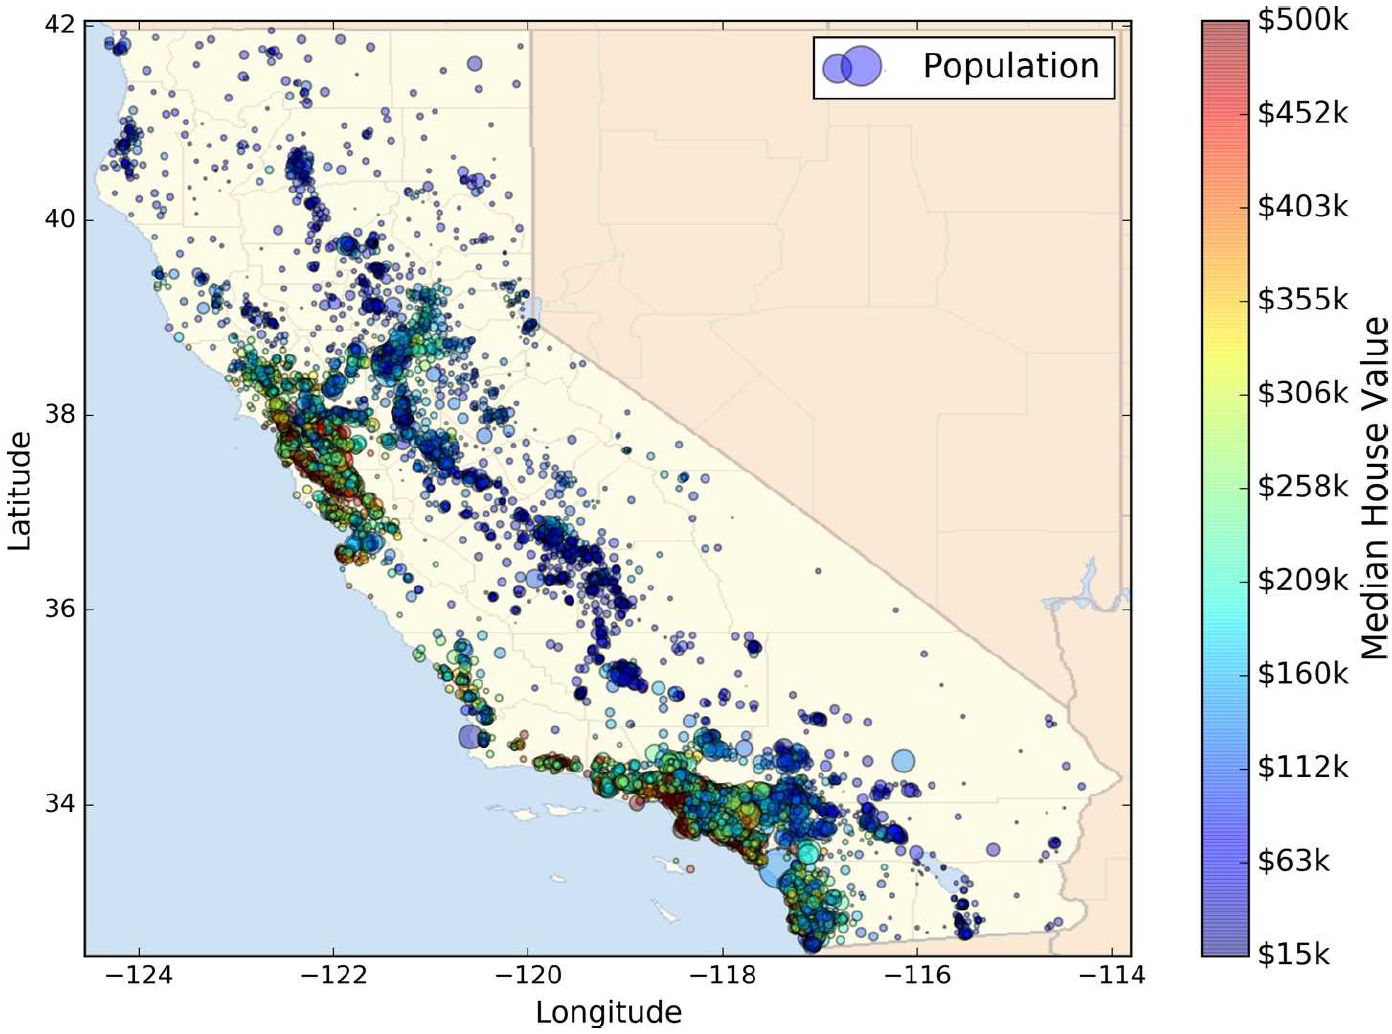

## 3.1 Verificando a estrutura dos dados

In [ ]:
import pandas as pd

# read the dataset to a Pandas' dataframe, separador default ','
data = pd.read_csv("drive/My Drive/CursoParadigmasdeAprendizagemMaquina/Pratica3/housing.csv")
data.head()

Cada linha representa um distrito. Há 10 atributos:
- **longitude**: distâncias computadas entre os centróides de cada distrito, medidas em longitude.
- **latitude**: distâncias computadas entre os centróides de cada distrito, medidas em latitude.
- **housing_median_age**: idade média das casas do distrito na localização
- **total_rooms**: total de cômodos no distrito.
- **total_bedrooms**: total de quartos no distrito
- **population**: população total no distrito
- **households**: total de domicílios no distrito
- **median_income**: renda média das famílias no distrito.
- **median_house_value**: valor médio das casas no distrito.
- **ocean_proximity**: distância até o oceano

O método **info()** é útil para obter uma descrição rápida dos dados, em particular o número total de linhas e o tipo e número de valores não nulos de cada atributo.

In [ ]:
data.info()

Primeiras observações obtidas a partir do método **info()** e **head()**:
- Existem 20.640 instâncias no conjunto de dados.
- É uma base relativamente pequena para os padrões de Machine Learning, mas é perfeito para começar.
- Observe que o atributo **total_bedrooms** tem apenas 20.433 valores não nulos, o que significa que 207 distritos estão sem essa informação (**missing values**). Teremos que cuidar disso mais tarde.
-  Todos os atributos são **numéricos**, exceto o campo **ocean_proximity**. Seu tipo é **object**, então ele pode conter qualquer tipo de objeto Python, mas como você carregou esses dados de um arquivo CSV, você sabe que deve ser um atributo de texto. Quando você olhou as cinco primeiras linhas, provavelmente notou que os valores nessa coluna eram repetitivos, o que significa que provavelmente é um atributo **categórico**.

In [ ]:
# Você pode descobrir quais categorias existem e
# quantos distritos pertencem a cada categoria
# utilizando o comando value_counts()

data.ocean_proximity.value_counts()

In [ ]:
# O método describe() mostra um resumo dos atributos numéricos
# Observe que as características não numéricas não foram mostradas
data.describe()

Informações extraídas do método **describe()**
- Observe que os valores nulos são ignorados (então, por exemplo, a contagem de total_bedrooms é **20.433**, não **20.640**).
- A linha **std** mostra o desvio padrão (que mede o quão dispersos os valores são).
- As linhas 25%, 50% e 75% mostram os percentis correspondentes: um percentil indica o valor abaixo do qual uma determinada porcentagem de observações em um grupo de observações se encontra. Por exemplo, **25%** dos distritos têm uma **housing_median_age** inferior a **18**, enquanto **50%** são inferiores a **29** e **75%** são inferiores a **37**. Estes são frequentemente chamados de 25º percentil (ou 1º quartil), a mediana e o 75º percentil (ou 3º quartil).

## 3.2 Realizando uma análise de dados rápida  utilizando o Pandas *Profiling* (*ydata-profiling*)

O Pandas [Profiling](https://pypi.org/project/pandas-profiling/)  simplifica o processo de obter uma visão geral da base de dados, gerando um relatório abrangente do seu conjunto de dados, minimizando o tempo para explorar esses grandes conjuntos de dados.

In [8]:
pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 66.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=baae07c2c7bec69688079ab73638aecfdaff93f43a92212eb6ce9954c605b913
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [9]:
import  ydata_profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(data)
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

##3.3 Verificar a ocorrência de dados duplicados

Com a base de dados completa, só devemos tirar os duplicados. Para verificar a ocorrência de instâncias duplicadas, utilizaremos o método [duplicated()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html).

In [ ]:
#Identifica registros duplicados nos dados
dupes=data.duplicated()
sum(dupes)

Caso, existisse linhas duplicadas em nossa base de dados, deveríamos retirar, utilizando o método [drop_duplicates()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html).

In [11]:
#remoção dos duplicados
data_ok = data.drop_duplicates(keep='first')

In [ ]:
#Identifica registros duplicados nos dados
dupes=data_ok.duplicated()
sum(dupes)

##3.4 Problema de Vazamento de Dados (*Data Leakage*)

O vazamento de dados acontece quando os dados utilizados em nosso conjunto de treinamento possui informações sobre o que o nosso modelo está tentando prever. Ou seja, quando o modelo é treinado com informações que ele não deveria ter acesso previamente. O principal efeito disso é bem óbvio, o modelo terá um bom desempenho nos dados de teste, mas poderá não performar bem ao ser posto em produção.

Um dos vazamento mais comuns é a contaminação de treino e teste. Esse tipo de vazamento ocorre quando você permite que informações dos dados de treino vazem para os dados de teste (ou validação). Na maioria das vezes isso ocorre durante a etapa de pré-processamento dos dados quando ela é feita antes da divisão em treino e teste. Por isso **o pré-processamento deve ser feito sempre após a divisão da base em treino e teste!**.

Preenchimento de valores vazios, tratamento de variáveis categóricas, normalização ou padronização dos dados, etc. **Tudo deve ser feito após a divisão entre treino e teste**.

A remoção de outliers também deve ser feita após a divisão da base em treinamento e teste para evitar data leakage e garantir a representatividade do conjunto de teste. No entanto, existem exceções a essa regra, e a melhor abordagem depende do contexto específico do seu problema.


## 3.5 Criar os conjuntos de treinamento e teste


Criar um conjunto de teste é teoricamente bem simples: basta escolher algumas instâncias aleatoriamente, normalmente 20% do conjunto de dados, e reservá-las:



[Scikit-Learn](http://scikit-learn.org/stable/) fornece algumas funções para dividir conjuntos de dados em vários subconjuntos de várias maneiras. A função mais simples é: [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

- Primeiro, há um parâmetro **random_state** que permite definir a semente do gerador aleatório. Você deve passar um valor inteiro para garantir uma saída reproduzível.
- E, em segundo lugar, você pode passar vários conjuntos de dados com um número idêntico de linhas, e ele os dividirá nos mesmos índices (isso é muito útil, por exemplo, se você tiver um DataFrame separado por rótulos (labels)).
- E, em terceiro lugar, os parâmetros **shuffle** e **stratify** garantem que em em problemas com rótulos, a quantidade das classes em cada conjunto (train e teste) será proporcional.

In [66]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data,
                                       test_size=0.2,
                                       random_state=33)

In [ ]:
print("train_set: {}".format(train_set.shape))
print("test_set: {}".format(test_set.shape))

#4.0 Vamos analisar mais...


Até agora, você apenas deu uma olhada rápida nos dados para ter uma compreensão geral do tipo de dados que está manipulando. Agora, o objetivo é ir um pouco mais a fundo.

- Primeiro, certifique-se de ter colocado o conjunto de teste de lado e **você está explorando apenas o conjunto de treinamento**.
- Além disso, se o conjunto de treinamento for muito grande, você pode querer amostrar um conjunto de exploração, para tornar as manipulações fáceis e rápidas. **No nosso caso, o conjunto é bem pequeno**, então você pode trabalhar diretamente no conjunto completo.
- Vamos **criar uma cópia** para que você possa brincar com ela sem prejudicar o conjunto de treinamento.

In [68]:
train = train_set.copy()

## 4.1 Procurando por correlações entre os atributos


Como o conjunto de dados não é muito grande, você pode facilmente calcular o coeficiente de correlação padrão (também chamado de r de Pearson) entre cada par de atributos usando o método **corr()**:
- 1: Correlação positiva perfeita. As variáveis aumentam ou diminuem juntas proporcionalmente.
- -1: Correlação negativa perfeita. Uma variável aumenta quando a outra diminui, e vice-versa, proporcionalmente.
- 0: Sem correlação linear. Não há relação linear entre as variáveis.

Uma boa correlação depende do contexto, mas é seguro dizer que você precisa de pelo menos 0.6 (ou -0.6) para chamá-la de uma correlação forte.

In [69]:
#Primeiro vamos retirar a coluna que não é numérica
#axis=1 é usado para especificar que você deseja remover uma coluna

train_num = train.drop('ocean_proximity', axis=1)

In [ ]:
#Correlação entre cada atributo e o atributo median_house_value e
# classifica essas correlações em ordem decrescente
corr_matrix = train_num.corr()
corr_matrix["median_house_value"].\
  sort_values(ascending=False)

A correlação acima ajuda a identificar quais atributos têm a maior influência (positiva ou negativa) no valor médio da casa (**median_house_value**).

O coeficiente de correlação varia de –1 a 1. O valor médio da casa (**median_house_value**) tende a aumentar quando a renda média aumenta (**median_income**).

Você pode ver uma pequena correlação negativa entre a **latitude** e o **median_house_value** (ou seja, os preços tendem a cair ligeiramente quando você vai para o norte).

Os demais atributos estão  próximos de zero indicando que não há correlação linear.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 6))
sns.heatmap(train_num.corr(),
            annot=True,
            fmt=".2f",
            cmap="RdBu_r",)

O atributo mais promissor para prever o valor médio da casa (**median_house_value**) é a renda média (**median_income**).

## 4.2 Experimentando combinações de atributos


Uma última coisa que você pode querer fazer antes de realmente preparar os dados para algoritmos de Aprendizagem de Máquina é experimentar várias combinações de atributos.
  - Por exemplo, **o número total de quartos em um distrito não é muito útil** se você não souber quantas famílias existem.
  - O que você realmente quer é o **número de quartos por domicílio**.
  - Da mesma forma, **o número total de quartos** por si só não é muito útil: você provavelmente deseja compará-lo ao número de cômodos.
  - E a **população por domicílio** também parece uma combinação interessante de atributos para se observar..
  
Vamos criar esses novos atributos!

In [72]:
# combinações de atributos
train["rooms_per_household"] = train["total_rooms"]/train["households"]
train["bedrooms_per_room"] = train["total_bedrooms"]/train["total_rooms"]
train["population_per_household"]=train["population"]/train["households"]

In [73]:
#Primeiro vamos retirar a coluna que não é numérica
train_num = train.drop('ocean_proximity', axis=1)

In [ ]:
train_correlation_matrix = train_num.corr()
train_correlation_matrix["median_house_value"].sort_values(ascending=False)

- O novo atributo **bedrooms_per_room** está muito mais correlacionado com o valor médio da casa (**media_house_value**) do que o número total de cômodos (**total_rooms**) ou quartos (**total_bedrooms**).
- Aparentemente, casas com uma menor proporção de quarto/cômodo tendem a ser mais caras.
- O número de cômodos por domicílio (**rooms_per_household**) também é mais informativo do que o número total de cômodos em um distrito (**total_rooms**) — obviamente, quanto maiores as casas, mais caras elas são.

Esta rodada de exploração não precisa ser absolutamente completa; o objetivo é  obter insights que o ajudarão a obter um primeiro protótipo razoavelmente bom.

Mas este é um **processo iterativo**: depois de ter um protótipo funcionando, você pode analisar sua saída para obter mais insights e voltar a esta etapa de exploração.

# 5.0 Passo2: Preparar os dados para algoritmos de Aprendizagem de Máquina


É hora de preparar os dados para seus algoritmos de Aprendizagem de Máquina.

Primeiro vamos separar  os preditores e os rótulos, pois não queremos necessariamente aplicar as mesmas transformações aos preditores e aos valores alvo.

In [75]:
# Para lembrar como dividimos nossa base
# train_set, test_set = train_test_split(data, test_size=0.2, random_state=33)

# drop retira da base de treinamento a coluna alvo
train_X = train_set.drop("median_house_value", axis=1)

# cria o conjunto y (conjunto de rótulos)
train_y = train_set.median_house_value.copy()

In [ ]:
train_X.shape

In [ ]:
train_y.shape

In [ ]:
train_X.info()

## 5.1 Manipulando atributos do tipo texto e categóricos


Anteriormente, deixamos de fora o atributo categórico **ocean_proximity** porque é um atributo de texto, então não podemos calcular sua mediana.

In [ ]:
#Verificar quantos valores existem para esse atributo
train_X.ocean_proximity.value_counts()

In [ ]:
train_X.ocean_proximity.head(10)

A maioria dos algoritmos de Aprendizagem de Máquina prefere trabalhar com números, então vamos converter esses rótulos de texto em números.

In [ ]:
#Vamos utilizar o método factorize() que mapeia cada categoria a um inteiro diferente

train_X_cat_encoded, train_X_categories = train_X.ocean_proximity.factorize()

# train_X_cat_encoded é agora numérico
train_X_cat_encoded[0:10]

In [ ]:
# train_X_categories contém a lista de categorias
train_X_categories

Um problema com essa representação é que **os algoritmos de ML assumirão que dois valores próximos são mais semelhantes do que dois valores distantes**.
- Obviamente, este não é o caso. (por exemplo, as categorias 0 e 4 são mais semelhantes do que as categorias 0 e 1).
- Para corrigir esse problema, uma solução comum é **criar um atributo binário por categoria**:
  - um atributo igual a 1 quando a categoria for "<1H OCEAN" (e 0 caso contrário), outro atributo igual a 1 quando a categoria for "INLAND" (e 0 caso contrário), e assim por diante.
  - Isso é chamado de **one-hot encoding**, porque apenas um atributo será igual a 1 (quente), enquanto os outros serão 0 (frio).
  - Essa solução funcional bem aqui, pois temos poucos valores para o atributo **ocean_proximity**
  - Vamos usar [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) do Scikit-Learn

In [83]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False,drop='first') # Adiciona o parâmetro  drop para evitar multicollinearity

# fit train_X: treina o OneHotEncoder, aprende as categorias presentes
encoder.fit(train_X["ocean_proximity"].values.reshape(-1,1))

#transform train_X: converte os dados categóricos em uma representação
#                   numérica, utilizando o que foi aprendido durante o fit.
# reshape(linha, coluna) do Numpy permite uma dimensão ser -1, que significa "não especificado"
train_X[encoder.get_feature_names_out(input_features=["ocean_proximity"])] = encoder.transform(train_X["ocean_proximity"].values.reshape(-1,1))

Ao remover a primeira categoria de cada atributo (**drop='first'**), o OneHotEncoder cria uma representação mais compacta dos dados, reduzindo a redundância e evitando a multicolinearidade. A multicolinearidade ocorre quando dois ou mais atributos preditores em um modelo de regressão são altamente correlacionados.

O atributo em questão possui 5 categorias: '<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'. O OneHotEncoder com **drop='first'** criará apenas 4 colunas.
A categoria "<1H OCEAN" é implicitamente representada quando ambas as colunas 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND' têm valor 0.

In [ ]:
train_X.info()

In [ ]:
train_X['ocean_proximity_INLAND'].value_counts()

In [ ]:
train_X['ocean_proximity_ISLAND'].value_counts()

In [ ]:
train_X['ocean_proximity_NEAR BAY'].value_counts()

In [ ]:
train_X['ocean_proximity_NEAR OCEAN'].value_counts()

Vamos retirar o atributo do tipo **Object**

In [89]:
#retirando os campos do tipo object
train_X = train_X.drop("ocean_proximity", axis=1)

## 5.2 Limpeza dos dados


A **maioria dos algoritmos de Aprendizagem de Máquina não consegue trabalhar com atributos faltantes**, então vamos criar algumas funções para cuidar deles. Você notou anteriormente que o atributo **total_bedrooms** tem alguns valores faltantes, então vamos corrigir isso.

In [ ]:
# Conta o número de valores faltantes
train_X.isnull().sum()

Você tem 3 opções:
1. Deletar as linhas que referem a esse distrito que não possui valor para este campo. (método: [dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html))
2. Deletar o atributo em questão. (método: [drop()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html))
3. Atribuir valores para esses dados faltantes (zero, a média, a mediana, etc) (método: [fillna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html))

>```python
train_X.dropna(subset=["total_bedrooms"]) # opção 1
train_X.drop("total_bedrooms", axis=1) # opção 2
median = train_X["total_bedrooms"].median()
train_X["total_bedrooms"].fillna(median) # opção 3
```

Se você escolher a opção 3, você deve calcular o valor mediano no conjunto de treinamento e usá-lo para preencher os valores ausentes no conjunto de treinamento, mas também **não se esqueça de salvar o valor mediano que você calculou. Você precisará dele mais tarde para substituir os valores ausentes no conjunto de teste** e também quando o sistema entrar em operação para substituir valores ausentes em novos dados.

Scikit-Learn fornece uma classe útil para cuidar de valores ausentes: [Imputer](scikit-learn.org/stable/api/sklearn.impute.html). Vamos ver como usá-la!

Antes disso vamos conhecer 3 métodos importantes, utilizados na preparação dos dados!

1. **fit()**
- **Objetivo**: Aprender parâmetros dos dados de treinamento.
- **Entrada**: Dados de treinamento.
- **Saída**: O próprio objeto estimador (com parâmetros aprendidos).
- **Exemplo**: Ao usar Imputer, fit() calcula a mediana (ou média, etc.) para cada atributo.

2. **transform()**
- **Objetivo**: Aplicar a transformação aprendida a um conjunto de dados.
- **Entrada**: Dados (treinamento ou novos dados).
- **Saída**: Dados transformados.
- **Exemplo**: Com Imputer, transform() substitui os valores ausentes pelas medianas calculadas durante fit().

3. **fit_transform()**
- **Objetivo**: Combina fit() e transform() em uma única etapa. É equivalente a chamar fit() e depois transform() nos mesmos dados.
- **Entrada**: Dados de treinamento.
- **Saída**: Dados de treinamento transformados.
- **Eficiência**: Muitas vezes computacionalmente mais eficiente do que chamar fit() e transform() separadamente.



In [91]:
# Primeiro, você precisa criar uma instância do Imputer, especificando que deseja
# substituir os valores ausentes de cada atributo pela mediana desse atributo
# retorna um array NumPy
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# Agora você pode ajustar e utilizar o imputer treinado para
#transformar o conjunto de treinamento, substituindo valores faltantes pelas medianas aprendida
#O resultado é um  array Numpy contendo os atributos transformados
train_X_array = imputer.fit_transform(train_X)

#Convertendo o array para um dataframe
train_X_df = pd.DataFrame(train_X_array, columns=train_X.columns)

In [ ]:
train_X_df.isnull().sum()

In [ ]:
train_X_df.describe()

O **imputer** simplesmente calculou a mediana de cada atributo e armazenou o resultado em sua variável de instância **statistics_**.

Apenas o atributo **total_bedrooms** tinha valores ausentes, mas não podemos ter certeza de que não haverá valores ausentes em novos dados depois que o sistema entrar em operação, então é mais seguro aplicar o **imputer** a todos os atributos numéricos:

In [ ]:
imputer.statistics_

In [ ]:
train_X.median().values

##5.3 Remoção dos Outliers

Outliers são pontos de dados que se afastam significativamente do padrão geral dos demais valores. Eles podem ser resultado de erros de medição, ruídos, comportamentos anômalos ou eventos raros. A presença de outliers pode distorcer as estatísticas descritivas, afetar a distribuição dos dados e prejudicar a interpretação dos resultados.

Quando encontramos outliers, existem várias abordagens possíveis para tratá-los. Uma opção é remover os valores discrepantes do conjunto de dados, especialmente se forem considerados erros de medição ou valores incorretos.

É importante ressaltar que a decisão de considerar um valor como outlier depende do contexto do problema e do domínio do assunto. Portanto, é necessário analisar cuidadosamente cada ponto destacado e avaliar se eles são verdadeiros outliers ou apenas valores extremos válidos.


Vamos analisar a ocorrência de outliers, utilizando a função describe do Pandas

In [ ]:
train_X_df.describe()

O boxplot é uma poderosa ferramenta visual que nos permite identificar de forma rápida e intuitiva a presença de outliers em um conjunto de dados.Ele é composto por elementos como a mediana, quartis, intervalo interquartil (IQR) e pontos fora dos limites.

O IQR é calculado subtraindo-se o Q1 do Q3, representando assim a dispersão dos dados no intervalo central.

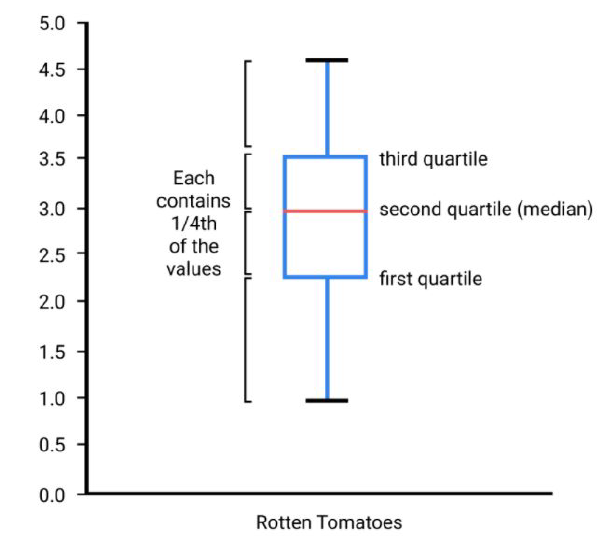

In [ ]:
train_X_df.info()

In [ ]:
print(train_X_df.columns)

In [99]:
colunas_num =['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

In [ ]:
import matplotlib.pyplot as plt
train_X_df[colunas_num].plot(kind='box',
                        layout=(4,2),
                        subplots=True,
                        figsize=(8,8),
                        sharex=False)
plt.tight_layout()
plt.show()

### 5.3.1 Utilizando Intervalo Interquartil (IQR = Q3 - Q1)


IQR é uma medida estatística robusta que nos ajuda a quantificar a dispersão dos dados e identificar valores discrepantes (outliers).

O IQR pode ser calculado para determinar os limites de aceitação de valores dentro de um conjunto de dados.

Para identificar outliers utilizando o boxplot, é comum utilizar uma regra prática que considera valores como outliers se estiverem além de um determinado limite, definido como Q1–1,5 * IQR para os valores inferiores e Q3 + 1,5 * IQR para os valores superiores. Pontos fora desses limites são destacados como possíveis outliers.

In [101]:
colunas_num =['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

In [102]:
train_iqr = train_X_df[colunas_num].copy()

In [ ]:
Q1 = train_iqr.quantile(0.25)
Q1

In [104]:
Q3 = train_iqr.quantile(0.75)
Q3

,0.75
longitude,-118.010000
latitude,37.710000
housing_median_age,37.000000
total_rooms,3138.250000
total_bedrooms,644.000000
population,1728.000000
households,605.000000
median_income,4.739375


In [ ]:
IQR = Q3 - Q1
IQR

In [ ]:
low = Q1 - 1.5 * IQR
low

In [ ]:
up = Q3 + 1.5 * IQR
up

In [108]:
#axis = 1: coluna
train_iqr = train_iqr[((train_iqr > low).all(axis=1) & (train_iqr < up).all(axis=1))]

In [ ]:
train_iqr.shape

In [ ]:
train_iqr.info()

In [ ]:
train_X_df.describe()

In [ ]:
train_iqr.describe()

In [ ]:
train_iqr.plot(kind='box',layout=(4,2),
                        subplots=True,
                        figsize=(8,8),
                        sharex=False)

plt.tight_layout()
plt.show()

Agora vamos juntar a base sem outliers com a base que tem todos os atributos, onde irá permanecer somente as linhas que não existem outliers

In [ ]:
train_X_df.columns

In [117]:
base_merge = pd.merge(train_iqr, train_X_df, left_on=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
                      right_on=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'], how='inner')

In [ ]:
base_merge.info()

## 5.4 Criação de novos atributos


Na seção, 4.2 analisamos a criação de novos atributos a partir da combinação de outros. Agora, vamos efetuar na nossa base de treinamento

In [119]:
# combinações de atributos
base_merge["rooms_per_household"] = base_merge["total_rooms"]/base_merge["households"]
base_merge["bedrooms_per_room"] = base_merge["total_bedrooms"]/base_merge["total_rooms"]
base_merge["population_per_household"]=base_merge["population"]/base_merge["households"]

## 5.5 Normalização dos atributos

Uma das transformações mais importantes que você precisa aplicar aos seus dados é o escalonamento de atributos. Com poucas exceções, os algoritmos de Machine Learning não funcionam bem quando os atributos numéricos de entrada têm escalas muito diferentes.

In [ ]:
base_merge.describe()

Este é o caso para os dados de imóveis:
- o número total de cômodos (**total_rooms**) varia de 6 a 5675
- a renda média (**median_income**) varia de 0 a 8.

**Geralmente não é necessário escalonar os valores alvo (target), pois a maioria dos algoritmos de aprendizado de máquina se concentra em minimizar o erro entre as previsões e os valores reais da variável alvo, e não na escala dos valores em si.**

Existem duas maneiras comuns de fazer com que todos os atributos tenham a mesma escala:
- Escalonamento min-max (Normalização)
- Padronização.

O **escalonamento Min-Max** é bem simples: os valores são deslocados e reescalados para que acabem variando de 0 a 1. Isso é feito  subtraindo o valor mínimo e dividindo pelo máximo menos o mínimo.Scikit-Learn fornece um transformador para isso chamado [MinMaxScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

A **padronização** é bem diferente: primeiro, ela subtrai o valor médio (então os valores padronizados sempre têm uma média zero) e, em seguida, divide pela variância para que a distribuição resultante tenha variância unitária.  Scikit-Learn fornece um transformador para padronização:  [StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

Ao contrário do escalonamento Min-Max, a padronização não limita os valores a um intervalo específico, o que pode ser um problema para alguns algoritmos (por exemplo, as redes neurais geralmente esperam um valor de entrada variando de 0 a 1). No entanto, a padronização é muito menos afetada por **outliers**.

Os atributos que já estão no intervalo de 0 e 1 não serão escalonados.

In [ ]:
base_merge.columns

In [122]:
lista_atributos = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
      'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

In [123]:
# Vamos escalonar usando StandardScaler, já que não analisamos os outliers
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
base_merge[lista_atributos] = std_scaler.fit_transform(base_merge[lista_atributos])

In [ ]:
base_merge.describe()

#6.0 Exercício

Seguindo o passo a passo acima, realize a engenharia de atributos (**feature engineering**) na base **listing.csv** que contém dados do Airbnb (fonte: https://insideairbnb.com/).

In [ ]:
import pandas as pd

# read the dataset to a Pandas' dataframe
data = pd.read_csv("drive/My Drive/CursoParadigmasdeAprendizagemMaquina/Pratica3/listings.csv")
data.head()

<ipython-input-54-f68f415cb0e9>:4: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("drive/My Drive/CursoParadigmasdeAprendizagemMaquina/Pratica3/listings.csv")


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20200619025839,2020-06-19,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. Please contact ...,"- Beautiful, sunny 2 bedroom (90 square meters...",Discounts for long term stays. Please contact ...,none,This is the one of the bests spots in Rio. Bec...,...,t,f,moderate,f,f,1,1,0,0,2.08
1,21280,https://www.airbnb.com/rooms/21280,20200619025839,2020-06-19,Renovated Modern Apt. Near Beach,Immaculately renovated top-floor apartment ove...,Immaculately renovated top-floor apartment in ...,Immaculately renovated top-floor apartment ove...,none,This is the best neighborhood in Zona Sul. Fo...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.22
2,25026,https://www.airbnb.com/rooms/25026,20200619025839,2020-06-19,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,f,f,strict_14_with_grace_period,t,t,3,3,0,0,1.95
3,31560,https://www.airbnb.com/rooms/31560,20200619025839,2020-06-19,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.33
4,35636,https://www.airbnb.com/rooms/35636,20200619025839,2020-06-20,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,"The location is extremely convenient, safe and...",This cosy apartment is just a few steps away ...,none,The apartment street is very quiet and safe ....,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,2.23


In [ ]:
data.info(max_cols=106)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35731 entries, 0 to 35730
Data columns (total 106 columns):
 #    Column                                        Non-Null Count  Dtype  
---   ------                                        --------------  -----  
 0    id                                            35731 non-null  int64  
 1    listing_url                                   35731 non-null  object 
 2    scrape_id                                     35731 non-null  int64  
 3    last_scraped                                  35731 non-null  object 
 4    name                                          35673 non-null  object 
 5    summary                                       33143 non-null  object 
 6    space                                         21545 non-null  object 
 7    description                                   34298 non-null  object 
 8    experiences_offered                           35731 non-null  object 
 9    neighborhood_overview                         19

In [ ]:
data['zipcode'].value_counts()

zipcode
22020-001                    337
22050-002                    337
22071-100                    332
22790                        296
22780                        284
22410-003                    259
22795                        256
22775                        233
22711                        232
22250-040                    216
22011-010                    212
22040-002                    210
22010-010                    208
22011-040                    207
22021-010                    183
22630                        178
22630-010                    177
22061-020                    165
22040-010                    161
22080-010                    159
22420-041                    158
22081                        156
22020-010                    155
22420-040                    154
22071-020                    152
22775-040                    147
22793                        147
22411-030                    144
22071-110                    141
22080-001                    138
22

In [ ]:
data['state'].value_counts()

state
Rio de Janeiro                                         31220
RJ                                                      3039
State of Rio de Janeiro                                  941
Rj                                                       225
Rio De Janeiro                                           182
État de Rio de Janeiro                                    10
Estado de Río de Janeiro                                   7
Rio de janeiro                                             6
Copacabana                                                 5
rj                                                         4
rio de janeiro                                             4
Ipanema                                                    4
Rio De Janeiro – Rj                                        3
Brazil                                                     3
Barra da Tijuca                                            2
Leblon                                                     2
Rio De Janeiro (st